
 **Data Science and Machine Learning Combo**

Submitted by: Soundarya Lakshmi Arunachalam

Batch: DSP 20

Academic Year: 2019 - 2020

# Introduction

A very classic problem faced by such e-commerce websites is understanding the purchase behaviour of a customer. The lifeblood of retail businesses has always been sales.

**Association Rule Mining**
 
Association Rule Mining is used when you want to find an association between different objects in a set, find frequent patterns in a transaction database, relational databases or any other information repository. The applications of Association Rule Mining are found in Marketing, Basket Data Analysis (or Market Basket Analysis) in retailing, clustering and classification.

The most common approach to find these patterns is Market Basket Analysis, which is a key technique used by large retailers like Amazon, Flipkart, etc to analyze customer buying habits by finding associations between the different items that customers place in their “shopping baskets”. The discovery of these associations can help retailers develop marketing strategies by gaining insight into which items are frequently purchased together by customers. The strategies may include:

Changing the store layout according to trends
Customer behavior analysis
Catalog design
Cross marketing on online stores
What are the trending items customers buy
Customized emails with add-on sales etc..

Online retailers and publishers can use this type of analysis to:

Inform the placement of content items on their media sites, or products in their catalog
Deliver targeted marketing (e.g. emailing customers who bought products specific products with other products and offers on those products that are likely to be interesting to them.)

**Difference between Association and Recommendation**
 
Association rules do not extract an individual's preference, rather find relationships between sets of elements of every distinct transaction. This is what makes them different than Collaborative filtering which is used in recommendation systems.
To understand it better, Amazon page is the example

“Frequently Bought Together” → Association

“Customers who bought this item also bought” → Recommendation
 the basis of this technique, We’re really just interested in learning how often things go together and how to predict when things will go together.
 
 In this project, we will try and explore the basic information about the dataset given. The dataset for this project is a relational set of files describing customers' orders over time.

**Objective:**

The goal of the project is to predict which products will be in a user's next order.
The entire process of analyzing the shopping trends of customers is called ‘Market Basket Analysis’. 
 It is an analyzing technique based on the idea that if we buy an item then we are bound to buy or not-buy a group (or single) items. For example, if a customer is buying bread then the chances of him/her buying jam is more. This is represented by the following equation:
  A    =>     B
{if}        {then}

**Association Mining Rule**

This equation is called the Association Mining Rule. This can be thought of as an IF-THEN relationship. If item A is bought by a customer then the chances of item B being bought by the same user in the same transaction is found out. Here A is called the Antecedent and B the consequent. Antecedents are primary item that are found in the basket and consequents are the items that are found with an antecedent/group of antecedents. The metrics for measuring association are:

**Support**: It tells us about the combination of items bought together frequently. It gives the part of transactions that contain both A and B.
support = freq(A,B)/N
We can filter out the less frequently occurring items-sets using support.

**Confidence**: It tells us how frequently the items A and B are bought together, for the no. of times A is bought.
conf = freq(A,B)/freq(A)

**Lift**: It indicates the strength of a rule over the randomness of A and B being bought together. It basically measures the strength of any association rule(we will talk about association rules below).
lift = supp / (supp(A)*supp(B))

More the lift more is the strength of the rule. If the lift is 3 for A -> B then it means if we buy A, the chances of buying B is 3 times.

So the process is to make rules for each item-set to figure out the metrics of its association so as to decide whether to include it in the analysis or not. But consider a large data-set having millions of user and transactions, thereby producing a large amount of item-sets. So to make rules for all of these would be a humongous task. This is where Apriori algorithm enters the scene.
Apriori algorithm uses frequently bought item-sets to generate association rules. It is built on the idea that the subset of a frequently bought items-set is also a frequently bought item-set. Frequently bought item-sets are decided if their support value is above a minimum threshold support value.

# Importing libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Reading input files

Reading all the files as DataFrame

In [ ]:
aisles = pd.read_csv("/content/drive/My Drive/MLP project/aisles.csv")
departments = pd.read_csv("/content/drive/My Drive/MLP project/departments.csv")
order_products_prior = pd.read_csv("/content/drive/My Drive/MLP project/order_products_prior.csv")
order_products_test = pd.read_csv("/content/drive/My Drive/MLP project/order_products_test.csv")
order_products_train = pd.read_csv("/content/drive/My Drive/MLP project/order_products_train.csv")
orders = pd.read_csv("/content/drive/My Drive/MLP project/orders.csv")
products = pd.read_csv("/content/drive/My Drive/MLP project/products.csv")

In [ ]:
orders.eval_set.unique()

array(['prior', 'train', 'test'], dtype=object)

In [ ]:
orders.head()

,Unnamed: 0,days_since_prior_order,eval_set,order_dow,order_hour_of_day,order_id,order_number,user_id
0,0,NaN,prior,2,8,2539329,1,1
1,1,15.0,prior,3,7,2398795,2,1
2,2,21.0,prior,3,12,473747,3,1
3,3,29.0,prior,4,7,2254736,4,1
4,4,28.0,prior,4,15,431534,5,1


**orders**
This file gives a list of all orders we have in the dataset. 1 row per order. For example, we can see that user 1 has 11 orders, 1 of which is in the train set, and 10 of which are prior orders. The orders.csv doesn’t tell us about which products were ordered. This is contained in the order_products.csv

In [ ]:
order_products_train.head()

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered
0,8,36,39612,1,0
1,9,36,19660,2,1
2,10,36,49235,3,0
3,11,36,43086,4,1
4,12,36,46620,5,1


**order_products_train**
This file gives us information about which products (product_id) were ordered. It also contains information of the order (add_to_cart_order) in which the products were put into the cart and information of whether this product is a re-order(1) or not(0).

For example, we see below that order_id 1 had 8 products, 4 of which are reorders.

Still we don’t know what these products are. This information is in the products.csv

In [ ]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


**products** This file contains the names of the products with their corresponding product_id. Furthermore the aisle and deparment are included.

In [ ]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


**order_products_prior** This file is structurally the same as the other_products_train.csv.

In [ ]:
order_products_test.head()

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered
0,0,1,49302,1,1
1,1,1,11109,2,1
2,2,1,10246,3,0
3,3,1,49683,4,0
4,4,1,43633,5,1


In [ ]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


**aisles** This file contains the different aisle id and the aisle.

In [ ]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


**departments** This file contains the department id and the department

In [ ]:
orders.head()

,Unnamed: 0,days_since_prior_order,eval_set,order_dow,order_hour_of_day,order_id,order_number,user_id
0,0,NaN,prior,2,8,2539329,1,1
1,1,15.0,prior,3,7,2398795,2,1
2,2,21.0,prior,3,12,473747,3,1
3,3,29.0,prior,4,7,2254736,4,1
4,4,28.0,prior,4,15,431534,5,1


# Data Cleaning

Now lets clean the data and look at the missing values in each data set.

In [ ]:
orders[orders["order_number"]==1].count()

Unnamed: 0                62764
days_since_prior_order        0
eval_set                  62764
order_dow                 62764
order_hour_of_day         62764
order_id                  62764
order_number              62764
user_id                   62764
dtype: int64

In [ ]:
orders.isnull().sum()

Unnamed: 0                    0
days_since_prior_order    62764
eval_set                      0
order_dow                     0
order_hour_of_day             0
order_id                      0
order_number                  0
user_id                       0
dtype: int64

The null values in the orders dataset are in the	days_since_prior, which are nothing but the days since the last order, capped at 30 (with NAs for order_number = 1)

In [ ]:
orders.isnull().mean().round(4) * 100

Unnamed: 0                0.00
days_since_prior_order    5.99
eval_set                  0.00
order_dow                 0.00
order_hour_of_day         0.00
order_id                  0.00
order_number              0.00
user_id                   0.00
dtype: float64

In [ ]:
aisles.isnull().mean().round(4) * 100

aisle_id    0.0
aisle       0.0
dtype: float64

In [ ]:
departments.isnull().mean().round(4) * 100

department_id    0.0
department       0.0
dtype: float64

In [ ]:
order_products_prior.isnull().mean().round(4) * 100

order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64

In [ ]:
order_products_train.isnull().mean().round(4) * 100

Unnamed: 0           0.0
order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64

In [ ]:
order_products_test.isnull().mean().round(4) * 100

Unnamed: 0           0.0
order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64

In [ ]:
products.isnull().mean().round(4) * 100

product_id       0.0
product_name     0.0
aisle_id         0.0
department_id    0.0
dtype: float64

On looking at all the datasets, only orders dataset has missing values. Also we can see that only 6% of days_since_prior_order column is null, which is nothing but the days since the last order, capped at 30 (with NAs for order_number = 1). So we can exclude them and use the data. We are concluding the data cleaning process here as there are no other missing values.

# Exploratory Data Analysis

In [ ]:
count=orders['eval_set'].value_counts()
count

prior    985811
train     48406
test      14358
Name: eval_set, dtype: int64

Text(0.5, 1.0, 'Eval_set breakdown in orders dataset')

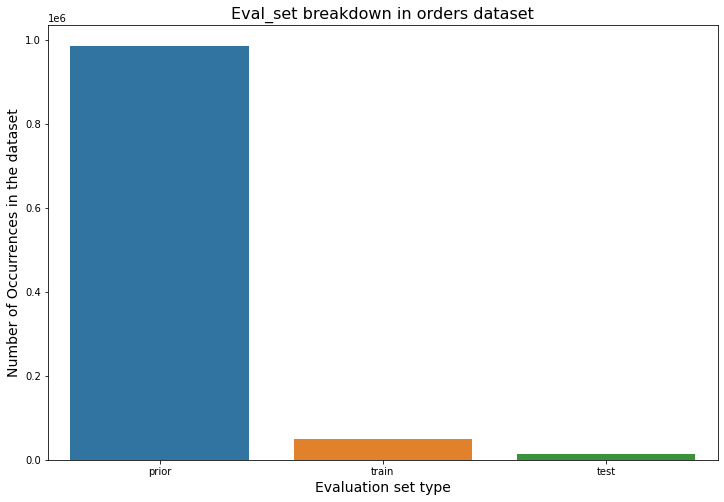

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(count.index, count.values)
plt.ylabel('Number of Occurrences in the dataset', fontsize=14)
plt.xlabel('Evaluation set type', fontsize=14)
plt.title('Eval_set breakdown in orders dataset', fontsize=16)

In [ ]:
order_products_train.shape

(1068168, 5)

# Problem Statements

## Peak turnover

1)	When do customers order the most?
  -	Day of the week
  -	Time of the day
  -	Combination of the above two.


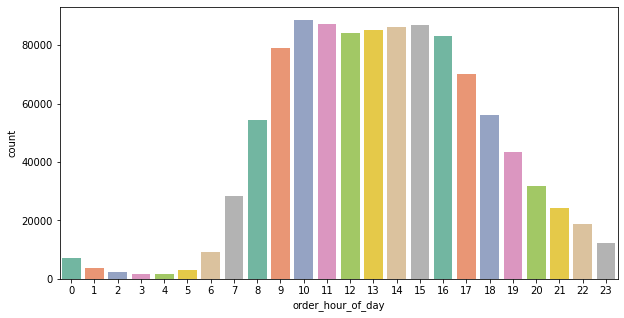

In [ ]:
plt.figure(figsize= (10,5))
ax = sns.countplot(x= "order_hour_of_day", data = orders, palette= 'Set2')

From the graph above we can see that the maximum number of orders is around 10 to 11 AM followed by 2 to 3 PM. On the other hand the orders are least at 3 to 4 AM, that's the time people usually are asleep. Now in order to know more, let's see how the orders vary across different days of the week.

In [ ]:
orders['order_dow'].value_counts()

0    184042
1    180123
2    143261
5    139157
6    137590
3    134145
4    130257
Name: order_dow, dtype: int64

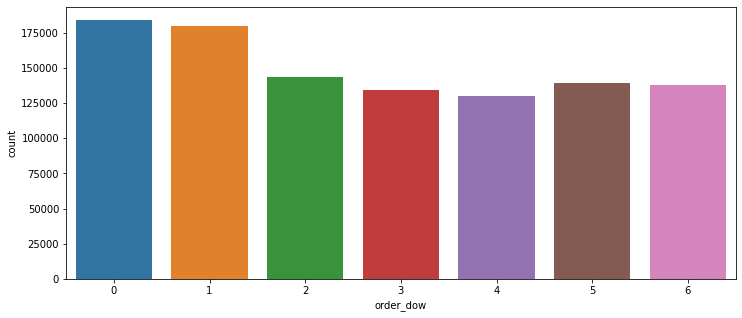

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x="order_dow", data=orders)

We can say that, customers order the most on Day 0, i.e on Sunday, followed by Day 1- Monday.

Now let us see the time of the day at which the sales is maximum for each day.

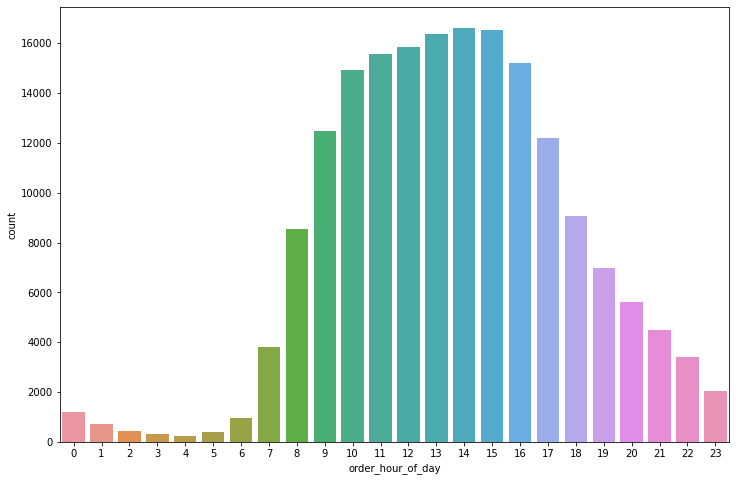

In [ ]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders[orders['order_dow']==0])

We can see from the visualization that, day 0 has maximum sales between 2 to 3 PM followed by 1 to 2 PM.



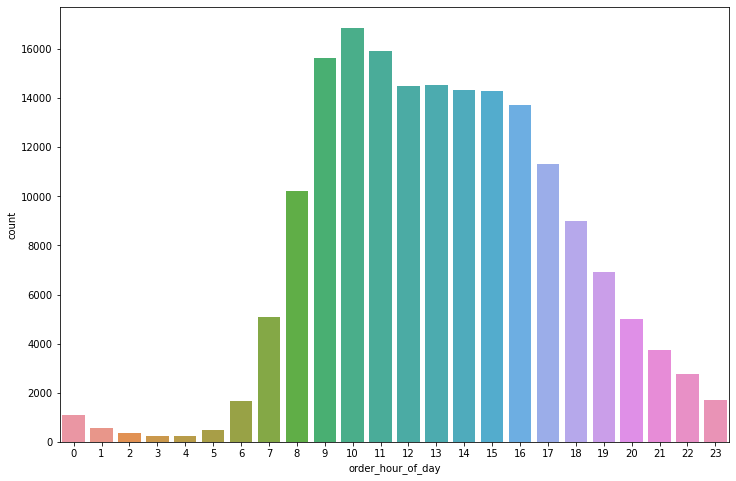

In [ ]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders[orders['order_dow']==1])

Day 1 has maximum sales between 10 to 11 AM followed by 9 to 10 AM.

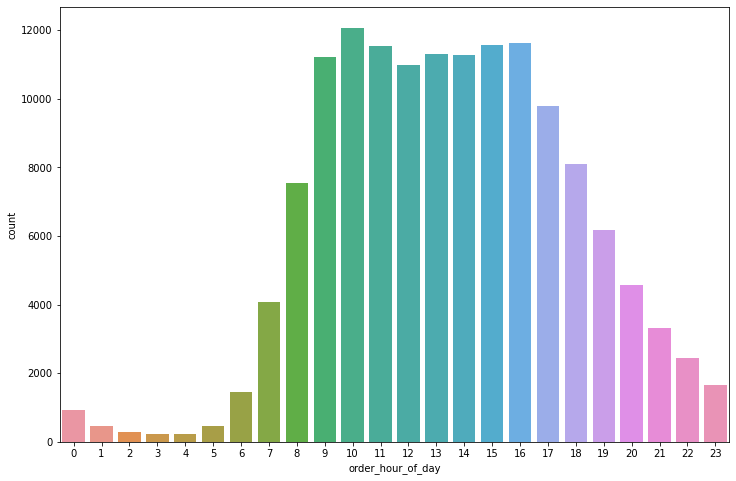

In [ ]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders[orders['order_dow']==2])

Day 2 has maximum sales between 10 to 11 AM followed by 3 to 4 PM

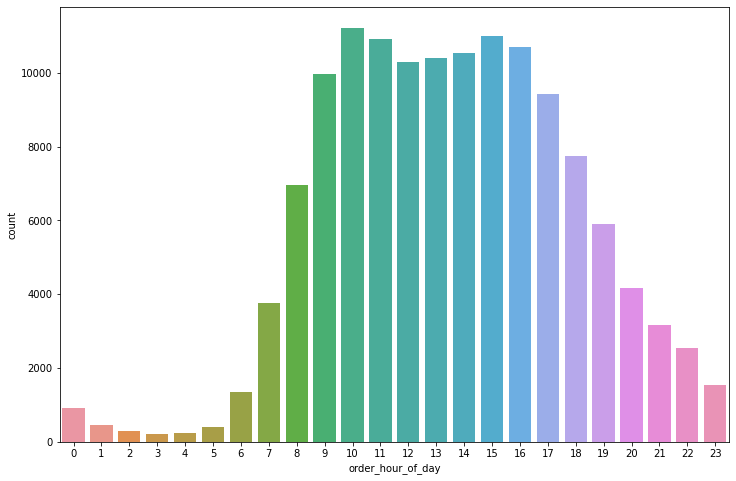

In [ ]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders[orders['order_dow']==3])

Day 3 has maximum sales between 10 to 11 AM followed by 3 to 4 PM

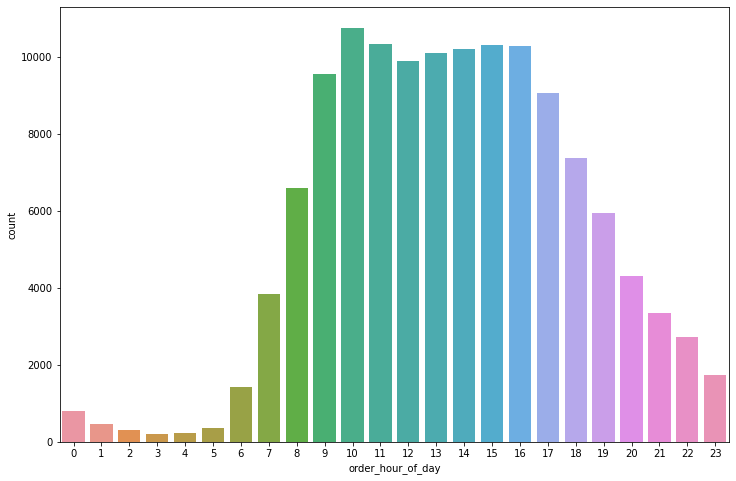

In [ ]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders[orders['order_dow']==4])

Day 4 has maximum sales between 10 to 11 AM followed by 3 to 4 PM

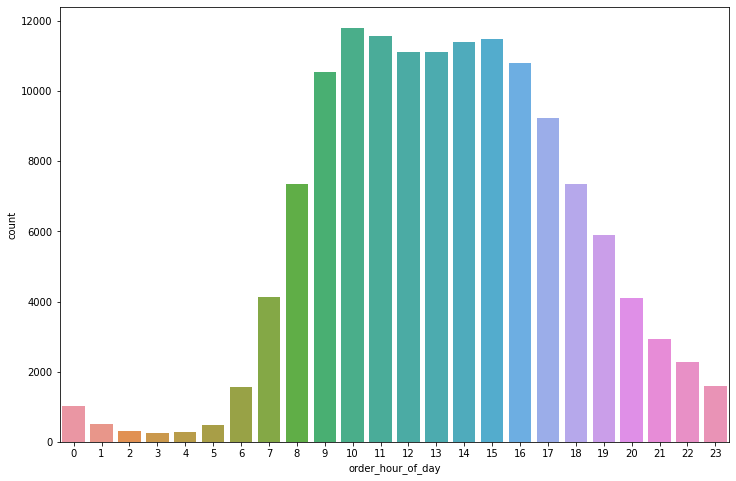

In [ ]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders[orders['order_dow']==5])

Day 5 has maximum sales between 10 to 11 AM followed by 2 to 3 PM

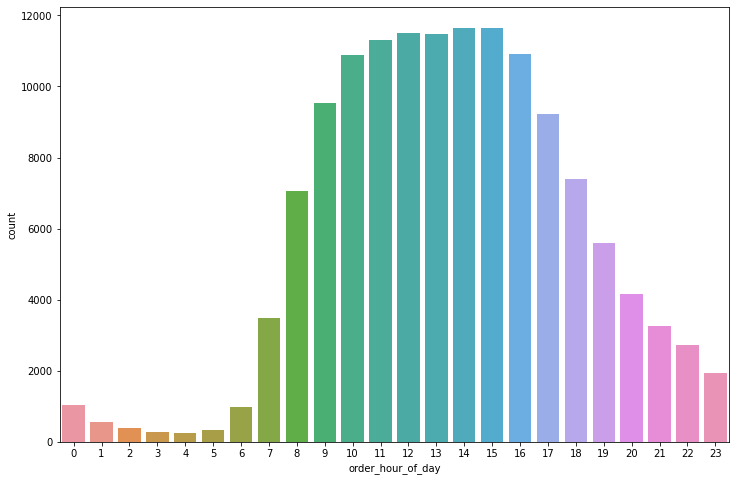

In [ ]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders[orders['order_dow']==6])

Day 6 has maximum sales between 2 to 3 PM followed by 12 to 1 PM

It seems that, Days 1 to 5 has maximum number of orders places between 10 to 11 AM , whereas for day 0 and day 6 it is between 2 to 3 PM. We can conclude that on weekends the sales is at the peak in the afternoon and on the weekdays it is in the morning time.

Now, let's get the orders in terms of hour of the day and day of the week in a single dataset by using the groupby option for better visualization.

In [ ]:
grouped_orders = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_orders

,order_dow,order_hour_of_day,order_number
0,0,0,1206
1,0,1,727
2,0,2,448
3,0,3,331
4,0,4,256
...,...,...,...
163,6,19,5582
164,6,20,4154
165,6,21,3266
166,6,22,2714


In [ ]:
#pivoting the table for clarity
grouped_orders = grouped_orders.pivot('order_dow', 'order_hour_of_day', 'order_number')
grouped_orders

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,,,,
0,1206,727,448,331,256,387,961,3817,8562,12468,14932,15567,15829,16385,16619,16514,15202,12185,9072,6980,5625,4490,3425,2054
1,1087,553,367,236,260,487,1661,5074,10203,15626,16869,15926,14508,14519,14347,14281,13707,11337,8980,6902,5022,3728,2747,1696
2,924,460,277,220,222,454,1445,4076,7555,11211,12075,11532,10975,11305,11274,11580,11622,9793,8089,6180,4571,3320,2448,1653
3,911,453,282,206,230,415,1356,3753,6964,9968,11224,10914,10299,10390,10547,11007,10699,9425,7748,5915,4162,3174,2555,1548
4,815,458,304,212,231,374,1418,3838,6608,9553,10764,10344,9912,10102,10215,10327,10277,9060,7382,5948,4300,3350,2727,1738
5,1022,498,309,258,285,479,1551,4145,7341,10545,11808,11567,11126,11119,11391,11487,10816,9242,7359,5895,4098,2941,2278,1597
6,1049,565,398,266,247,347,977,3494,7058,9539,10889,11313,11511,11479,11635,11651,10909,9214,7406,5582,4154,3266,2714,1927


In [ ]:
#Percentage of Reorders in order_products_prior dataset

print( 'Reorders in order_products_prior dataset is', (order_products_prior.reordered.sum() / len(order_products_prior)) * 100 ,'%' '\n')

#Percentage of Reorders in order_products_train dataset

print( 'Reorders in order_products_train dataset is', (order_products_train.reordered.sum() / len(order_products_train)) * 100 ,'%')

Reorders in order_products_prior dataset is 58.969746679221615 %

Reorders in order_products_train dataset is 59.861931830947945 %


Reorders in order_products_prior dataset is ~ 59% and 
reorders in order_products_train dataset is ~ 60%

## Top products

In [ ]:
#merging order_products_prior and products
prior_merged = pd.merge(order_products_prior, products, on='product_id', how='left')

#merging prior_merged with aisles
prior_merged = pd.merge(prior_merged, aisles, on='aisle_id', how='left')

#merging the new prior_merged with departments
prior_merged= pd.merge(prior_merged, departments, on='department_id', how='left')

In [ ]:
products_count = prior_merged['product_name'].value_counts().reset_index().head(20)
products_count.columns=['product_name','frequency']
products_count.head(10)

,product_name,frequency
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


So, these are the top 5 products that are ordered - Banana, Bag of Organic Bananas, Organic Strawberries, Organic Baby Spinach, Organic Hass Avocado.

In [ ]:
#Aisle frequency
aisle_count = prior_merged['aisle'].value_counts().reset_index().head(20)
aisle_count.columns=['aisle','frequency']
aisle_count.head(10)

,aisle,frequency
0,fresh fruits,3642188
1,fresh vegetables,3418021
2,packaged vegetables fruits,1765313
3,yogurt,1452343
4,packaged cheese,979763
5,milk,891015
6,water seltzer sparkling water,841533
7,chips pretzels,722470
8,soy lactosefree,638253
9,bread,584834


We can see that, the fresh food and fresh vegetables aisles are the most frequently visited.

In [ ]:
#For reorders

#merge order_product_prior with orders 
merged_reorders = pd.merge(order_products_prior, orders, on='order_id', how='right')

result_reordered = merged_reorders.loc[merged_reorders['reordered'] == 1.0] 

#merging reordered products from order_products_prior and products
result_reordered = pd.merge(result_reordered, products, on='product_id', how='left')

products_reorder_count = result_reordered['product_name'].value_counts().reset_index().head(20)
products_reorder_count.columns=['product_name','number of times reordered']
products_reorder_count.head(10)

,product_name,number of times reordered
0,Banana,121988
1,Bag of Organic Bananas,96357
2,Organic Strawberries,62878
3,Organic Baby Spinach,57835
4,Organic Hass Avocado,53588
5,Organic Avocado,41352
6,Organic Whole Milk,34747
7,Organic Raspberries,32827
8,Large Lemon,32309
9,Strawberries,30361


So, these are the top 5 products that are reordered - Banana, Bag of Organic Bananas, Organic Strawberries, Organic Baby Spinach, Organic Hass Avocado.

## Reorder Ratio

Reorder ratio - The repeat purchase rate calculation takes into account the purchases from repeat customers divided by all purchases on the site for a given date range.

Now, let us find the reorder ratio for each department.

In [ ]:
#For department wise reorders

dept_reorders = pd.merge(order_products_prior, products, on='product_id', how='left')
dept_reorders = pd.merge(dept_reorders, departments, on = 'department_id', how ='left')


In [ ]:
#result_dept_reorders = dept_reorders.loc[dept_reorders['reordered'] == 1.0] 
#dept_reorder_ratio = result_dept_reorders['department'].value_counts().reset_index().head(20)
dept_reorder_ratio = dept_reorders.groupby(["department"])["reordered"].aggregate("mean").reset_index()
dept_reorder_ratio.sort_values(by='reordered', ascending=False)

,department,reordered
7,dairy eggs,0.669969
3,beverages,0.653460
19,produce,0.649913
2,bakery,0.628141
8,deli,0.607719
18,pets,0.601285
1,babies,0.578971
5,bulk,0.577040
20,snacks,0.574180
0,alcohol,0.569924


'Dairy eggs' department has the highest and the department 'Personal Care' has the lowest reorder ratio.

## Models

Predictive modeling involves creating a model that outputs the probability of an outcome given current state values of input parameters.
Our given dataset is **transactional** in nature, for which Apriori Algorithm is used.

Lets start building models. Before that, we have to merge the dataframes with the required columns.

In [ ]:
data = order_products_train.append(order_products_prior,ignore_index = True)

In [ ]:
data = pd.merge(data, products, on = 'product_id', how = 'left')

In [ ]:
data = pd.merge(data, orders, on = 'order_id', how = 'inner')

In [ ]:
#To remove unnamed column and columns not required
data.drop(data.filter(regex="Unname"),axis=1, inplace=True)

data.drop('days_since_prior_order', axis =1, inplace=True)
data.drop(['eval_set'], axis=1, inplace=True)

In [ ]:
data.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
product_name         0
aisle_id             0
department_id        0
order_dow            0
order_hour_of_day    0
order_number         0
user_id              0
dtype: int64

In [ ]:
data_df = data

In [ ]:
data.product_name.nunique()

47972

In [ ]:
data.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,eval_set,order_dow,order_hour_of_day,order_number,user_id
0,36,39612,1,0,Grated Pecorino Romano Cheese,2,16,train,6,18,23,79431
1,36,19660,2,1,Spring Water,115,7,train,6,18,23,79431
2,36,49235,3,0,Organic Half & Half,53,16,train,6,18,23,79431
3,36,43086,4,1,Super Greens Salad,123,4,train,6,18,23,79431
4,36,46620,5,1,Cage Free Extra Large Grade AA Eggs,86,16,train,6,18,23,79431


In [ ]:
data.dtypes

order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
product_name         int64
aisle_id             int64
department_id        int64
order_dow            int64
order_hour_of_day    int64
order_number         int64
user_id              int64
dtype: object

Having the clean data, lets start building models.

In [ ]:
# Import label encoder- Converting each value in column to a number.
from sklearn import preprocessing

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'product_name'. 
data['product_name']= label_encoder.fit_transform(data['product_name']) 


In [ ]:
# Load the data
X = data.drop('reordered', axis = 1)
y = data['reordered']


In [ ]:
# Creating Train and Validation data by using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Logistic Regression

In [ ]:
# Logistic Regression Model
# Logistic regression model is created to predict the probability of occurrence of an event (like attrition) by fitting data into a logistic curve
from sklearn.linear_model import LogisticRegression

# Define the model
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

# Predict for train and validation data
lr_train = clf.predict(X_train)
lr_val = clf.predict(X_test)


In [ ]:
# Creating a text report
#target_names = ['class 0', 'class 1']

print('CLASSIFICATION REPORT FOR TRAIN DATA' '\n' '\n', classification_report(y_train, lr_train))
print('CLASSIFICATION REPORT FOR VALIDATION DATA' '\n' '\n', classification_report(y_test, lr_val))


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CLASSIFICATION REPORT FOR TRAIN DATA

               precision    recall  f1-score   support

           0       0.00      0.00      0.00   3424310
           1       0.59      1.00      0.74   4944810

    accuracy                           0.59   8369120
   macro avg       0.30      0.50      0.37   8369120
weighted avg       0.35      0.59      0.44   8369120

CLASSIFICATION REPORT FOR VALIDATION DATA

               precision    recall  f1-score   support

           0       0.00      0.00      0.00    856339
           1       0.59      1.00      0.74   1235941

    accuracy                           0.59   2092280
   macro avg       0.30      0.50      0.37   2092280
weighted avg       0.35      0.59      0.44   2092280



### Random Forest

In [ ]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# define model
rfc = RandomForestClassifier()

# fit model no training data
model_rf = rfc.fit(X_train, y_train)

# predict for both train and validation data
rf_train = model_rf.predict(X_train)
rf_val = model_rf.predict(X_test)


In [ ]:
# Creating a text report
print('CLASSIFICATION REPORT FOR TRAIN DATA' '\n' '\n', classification_report(y_train, rf_train))
print('CLASSIFICATION REPORT FOR VALIDATION DATA' '\n' '\n', classification_report(y_test, rf_val))


CLASSIFICATION REPORT FOR TRAIN DATA

               precision    recall  f1-score   support

           0       0.74      0.41      0.53   3424310
           1       0.69      0.90      0.78   4944810

    accuracy                           0.70   8369120
   macro avg       0.72      0.66      0.65   8369120
weighted avg       0.71      0.70      0.68   8369120

CLASSIFICATION REPORT FOR VALIDATION DATA

               precision    recall  f1-score   support

           0       0.74      0.41      0.53    856339
           1       0.69      0.90      0.78   1235941

    accuracy                           0.70   2092280
   macro avg       0.72      0.66      0.65   2092280
weighted avg       0.71      0.70      0.68   2092280



### XGB Model

In [ ]:
# XGB Model
import xgboost as xgb
#data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

# Define model
xgb_class = xgb.XGBClassifier(n_estimators = 10)
xgb_class.fit(X_train,y_train)

# Predict for both Train and Validation data
xgb_train = xgb_class.predict(X_train)
xgb_val = xgb_class.predict(X_test)

[14:56:14] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


In [ ]:
# Creating a text report
print('CLASSIFICATION REPORT FOR TRAIN DATA' '\n' '\n', classification_report(y_train, xgb_train))
print('CLASSIFICATION REPORT FOR VALIDATION DATA' '\n' '\n', classification_report(y_test, xgb_val))

CLASSIFICATION REPORT FOR TRAIN DATA

               precision    recall  f1-score   support

           0       0.73      0.47      0.57   3424310
           1       0.70      0.88      0.78   4944810

    accuracy                           0.71   8369120
   macro avg       0.71      0.67      0.67   8369120
weighted avg       0.71      0.71      0.69   8369120

CLASSIFICATION REPORT FOR VALIDATION DATA

               precision    recall  f1-score   support

           0       0.73      0.47      0.57    856339
           1       0.70      0.88      0.78   1235941

    accuracy                           0.71   2092280
   macro avg       0.71      0.67      0.67   2092280
weighted avg       0.71      0.71      0.69   2092280



In [ ]:

# Getting the test data ready 

test = order_products_test
data_test = test.append(order_products_prior,ignore_index = True)
data_test = pd.merge(data_test, products, on = 'product_id', how = 'left')
data_test = pd.merge(data_test, orders, on = 'order_id', how = 'inner')
true_val = data_test.reordered.values

#To remove unnamed column and columns not required
data_test.drop(data_test.filter(regex="Unname"),axis=1, inplace=True)
data_test.drop('days_since_prior_order', axis =1, inplace=True)
data_test.drop(['eval_set'], axis=1, inplace=True)
data_test.drop(['reordered'], axis=1, inplace=True)

# Encode labels in column 'product_name'. 
data_test['product_name']= label_encoder.fit_transform(data_test['product_name']) 


In [ ]:
# Prediction for test data
xgb_preds = xgb_class.predict(data_test)

In [ ]:
# To check the goodness of the model 
print('CLASSIFICATION REPORT FOR VALIDATION DATA' '\n' '\n', classification_report(true_val, xgb_preds))

CLASSIFICATION REPORT FOR VALIDATION DATA

               precision    recall  f1-score   support

           0       0.73      0.47      0.57   4136520
           1       0.71      0.88      0.78   5965173

    accuracy                           0.71  10101693
   macro avg       0.72      0.68      0.68  10101693
weighted avg       0.71      0.71      0.70  10101693



In [ ]:
data.shape # DataFrame is too big

### APRIORI ALGORITHM

Apriori Algorithm & Association Rules

Apriori Algorithm
Uses frequent item-sets to generate association rules. Based on the concept that a subset of a frequent item-set must be a frequent item-set. (frequent item-set is an item-set whose support value is greater than a threshold value specified )

The frequent item sets determined by Apriori can be used to determine association rules which highlight general trends in the database: this has applications in domains such as market basket analysis.

In [ ]:
data = data_df

In [ ]:
# For the purpose of analysis I have taken only the department = 2

data_1 = data[data['department_id'] == 3]

In [ ]:
# consolidate the items into 1 transaction per row with each product
basket_1 = data_1.groupby(['product_id', 'product_name'])['reordered'].sum().unstack().reset_index().fillna(0).set_index('product_id')
basket_1

In [ ]:
# Converting dataframe to list 
records = basket_1.iloc[:, :].astype(str).values.tolist()

In [ ]:
TE = TransactionEncoder()
array = TE.fit(records).transform(records)
#building the data frame rows are logical and columns are the items have been purchased 
transf_df = pd.DataFrame(array, columns = TE.columns_)
transf_df

Apriori module from mlxtend library provides fast and efficient apriori implementation.

In [ ]:
#I chose 0.01 minimum support
a_rules = apriori(transf_df, min_support = 0.01, use_colnames = True)
a_rules.head()

,support,itemsets
0,1.000000,(0.0)
1,0.052027,(1.0)
2,0.013514,(10.0)
3,0.014189,(11.0)
4,0.015541,(12.0)


In [ ]:
a_rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   33 non-null     float64
 1   itemsets  33 non-null     object 
dtypes: float64(1), object(1)
memory usage: 656.0+ bytes


In [ ]:
rules = association_rules(a_rules, metric = 'lift', min_threshold = 1)
rules.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
27,(7.0),(0.0),0.014865,1.000000,0.014865,1.000000,1.0,0.0,inf
28,(0.0),(8.0),1.000000,0.019595,0.019595,0.019595,1.0,0.0,1.0
29,(8.0),(0.0),0.019595,1.000000,0.019595,1.000000,1.0,0.0,inf
30,(0.0),(9.0),1.000000,0.015541,0.015541,0.015541,1.0,0.0,1.0
31,(9.0),(0.0),0.015541,1.000000,0.015541,1.000000,1.0,0.0,inf


In [ ]:
# Getting the results for LIFT above 1 and CONFIDENCE above 0.1

rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.1) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(1.0),(0.0),0.052027,1.0,0.052027,1.0,1.0,0.0,inf
3,(10.0),(0.0),0.013514,1.0,0.013514,1.0,1.0,0.0,inf
5,(11.0),(0.0),0.014189,1.0,0.014189,1.0,1.0,0.0,inf
7,(12.0),(0.0),0.015541,1.0,0.015541,1.0,1.0,0.0,inf
9,(13.0),(0.0),0.013514,1.0,0.013514,1.0,1.0,0.0,inf
11,(15.0),(0.0),0.012162,1.0,0.012162,1.0,1.0,0.0,inf
13,(16.0),(0.0),0.010135,1.0,0.010135,1.0,1.0,0.0,inf
15,(18.0),(0.0),0.010135,1.0,0.010135,1.0,1.0,0.0,inf
17,(2.0),(0.0),0.039189,1.0,0.039189,1.0,1.0,0.0,inf
19,(3.0),(0.0),0.028378,1.0,0.028378,1.0,1.0,0.0,inf


#### Test data

In [ ]:
order_products_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316449 entries, 0 to 316448
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Unnamed: 0         316449 non-null  int64
 1   order_id           316449 non-null  int64
 2   product_id         316449 non-null  int64
 3   add_to_cart_order  316449 non-null  int64
 4   reordered          316449 non-null  int64
dtypes: int64(5)
memory usage: 12.1 MB


In [ ]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
test = pd.merge(order_products_test, products[['product_name','product_id','department_id']], how ='left', on='product_id')
test.shape

(316449, 7)

In [ ]:
# Taken department_id = 2, same as the training dataset for the purpose of analysis
test_basket = test[test['department_id']==2]
test_basket.shape

(437, 7)

In [ ]:
#remove unnamed column and columns not required
test_basket.drop(test_basket.filter(regex="Unname"),axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
basket_2 = test_basket.groupby(['product_id', 'product_name'])['reordered'].sum().unstack().reset_index().fillna(0).set_index('product_id')
basket_2

product_name,100% Pure Eucalyptus,3mg Melatonin Dietary Supplement Tablets - 240 CT,93/7 Ground Beef,AA Rechargeable Nickel Metal Hydride Batteries,Agar Agar Powder,All Purpose Precision Tip 2 Pack,Antibacterial Liquid Hand Soap Fresh Citrus,Arrowroot Powder,Baby Eczema Relief Body Creme,Baby Eczema Therapy Soothing Bath Treatment,Baby Healing Ointment,Baby's Jarro-Dophilus +FOS Powder Probiotic Supplement,BabyRub® Soothing Ointment,Bareskin Premium Lubricant Condoms Sensitivity,Beef Chuck Roast,Beef Flank Steak,Black Chia Seeds,Black Pepper Grinder,Bloody Mary Mix,Bold & Spicy Bloody Mary Mix,Brightening Hydro Serum Facial Mask,Butt Paste Original Diaper Rash Ointment,Calendula with Beeswax & Sunflower Zinc Oxide Diaper Cream,California Blush Pink Champagne,California White Zinfandel,"Camilia, Single Liquid Doses",Candle Lighter,Caramelized Pecans,Cherry Flavor Natural Calm Anti-Stress Drink,Cherry Vanilla Granola,Children's Chestal Homeopathic Medicine,Cinnamon Vanilla Creme Liquid Coffee Creamer,Classic Lime Margarita,Classic Margarita Mix,Classic Vanilla Coffee Creamer,"Cocktail Mixer, Mojito",Coconut Almond Granola,Coconut Flour,Coffee Mate French Vanilla Creamer Packets,"Condoms, Premium Latex, Ultra Thin, Premium Lubricant",...,Rose Wine,Safety Swabs Cotton Products,Salted Mixed Nuts,Sambucus Nighttime Standardized Elderberry,SleepGels Nighttime Sleep Aid,SleepTabs Nighttime Sleep Aid,Spicy Salmon Roll,Spring Water Refill Liquid Hand Soap,Stella Pink Semi-Sweet,Stimulations Ecstasy Ultrasmooth Lubricant Premium Latex Condoms,Strike On Box Matches,Sunflower Seeds,Super Cleanse Tablets,"Super Glue, All Purpose, Brush",Sweetened Lime Juice,Sweets Organic Lollipops,Tahini Sesame Paste,Tape,The Original Margarita Mix,Toe Nail Clip,Traditional Panettone,Tropical Fruit Electrolyte Solution,Turbinado Sugar,Ultimate Intensive Healing Hand Cream,Ultra Thin Armor Spermicidal Lubricant Condoms,UltraGel Personal Lubricant,Unsalted Roasted Cashews,Vitamin Code Kids Chewable Whole Food Multivitamin For Kids Cherry Berry,Walnuts,Watch 2032BP Batteries,Water Based Personal Lubricant,Whispering Angel Rosé,White Zinfandel,Whole Bay Leaves,Whole Raw Brazil Nuts,Yogurt Covered Almonds,Yogurt Peanut Clusters,Zahatar Seasoning,Zen Party Mix,Zero Calorie Tonic Water
product_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
# Converting dataframe to list 
records_test = basket_2.iloc[:, :].astype(str).values.tolist()

TE = TransactionEncoder()
array_test = TE.fit(records_test).transform(records_test)

# building the data frame rows are logical and columns are the items have been purchased 
transf_testdf = pd.DataFrame(array_test, columns = TE.columns_)
transf_testdf

# apriori
a_rules_test = apriori(transf_testdf, min_support = 0.01, use_colnames = True)
a_rules_test.head()

# associationrule
rules_test = association_rules(a_rules_test, metric = 'lift', min_threshold = 1)
rules_test.tail()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(0.0),(2.0),1.000000,0.102703,0.102703,0.102703,1.0,0.0,1.0
4,(3.0),(0.0),0.016216,1.000000,0.016216,1.000000,1.0,0.0,inf
5,(0.0),(3.0),1.000000,0.016216,0.016216,0.016216,1.0,0.0,1.0
6,(6.0),(0.0),0.010811,1.000000,0.010811,1.000000,1.0,0.0,inf
7,(0.0),(6.0),1.000000,0.010811,0.010811,0.010811,1.0,0.0,1.0


We can see that the XG Boost Algorithm is predicting well compared to the Logistic Regression and the Random Forest Algorithm. So i went further and predicted for the test data and checked the values as well. I can see that its accuracy is 70%, which I feel is not that bad. 

But then, since the given data is transactional, the Apriori Algorithm is the one that is  identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database.

After getting the frequent itemsets, we used the Association Rule learning which is used in discovering interesting relations between variables in large databases. Also, I have done analysis on the data and have discovered the relationship between the frequent itemsets as a result of the Association Rule.